In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
flight = pd.read_excel("Flight_price_scraped.xlsx")

In [3]:
flight

,Unnamed: 0,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518"
1,1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488"
2,2,NaN,"Sun, Oct 17",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,"Sun, Oct 17",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419"
...,...,...,...,...,...,...,...,...,...,...
8584,8584,IndiGo,"Wed, Oct 20",New Delhi,Visakhapatnam,15:00,17:15,02 h 15 m,Non stop,"₹ 5,953"
8585,8585,IndiGo,"Wed, Oct 20",New Delhi,Visakhapatnam,15:45,18:05,02 h 20 m,Non stop,"₹ 5,955"
8586,8586,AirAsia,"Wed, Oct 20",New Delhi,Visakhapatnam,02:45,09:45,07 h,1 stop via Kolkata,"₹ 5,956"
8587,8587,Spicejet,"Wed, Oct 20",New Delhi,Visakhapatnam,07:10,12:25,05 h 15 m,1 stop via Hyderabad,"₹ 6,165"


# Preprocessing

In [4]:
flight.dropna(inplace=True)

Dropping null values.

In [5]:
flight.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
flight.head()

,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518"
1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488"
4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419"
5,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:55,08:15,10 h 20 m,1 stop via Bengaluru,"₹ 9,419"
6,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:15,13:40,05 h 25 m,1 stop via Visakhapatnam,"₹ 9,907"


In [7]:
flight['Airline'].value_counts()

IndiGo                            3375
AirAsia                            800
Go First                           723
Vistara                            425
Air India                          364
Spicejet                           355
IndiGo, AirAsia                     36
AirAsia, IndiGo                     28
IndiGo, Go First                    24
Qatar Airways, Vistara              22
AirAsia, Go First                   21
British Airways, Vistara            16
Go First, IndiGo                    13
Spicejet, IndiGo                    12
Air France, Vistara                 11
Air India, IndiGo                   10
Vistara, IndiGo                      9
IndiGo, Air India                    7
IndiGo, Spicejet                     6
Vistara, AirAsia                     5
Lufthansa, Vistara                   5
Lufthansa, Air Canada, Vistara       5
TruJet                               5
Spicejet, Go First                   5
KLM Royal Dutch, Vistara             5
Spicejet, Air India      

In [8]:
airline = ['IndiGo', 'AirAsia', 'Go First', 'Vistara', 'Air India', 'Spicejet']

In [9]:
flight_cleaned = flight[~flight.Airline.str.contains(',')]

In [10]:
flight_cleaned.shape

(6048, 9)

In [11]:
flight_cleaned.head()

,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518"
1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488"
4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419"
5,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:55,08:15,10 h 20 m,1 stop via Bengaluru,"₹ 9,419"
6,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:15,13:40,05 h 25 m,1 stop via Visakhapatnam,"₹ 9,907"


In [12]:
flight_cleaned.reset_index(drop=True)

,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518"
1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488"
2,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419"
3,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:55,08:15,10 h 20 m,1 stop via Bengaluru,"₹ 9,419"
4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:15,13:40,05 h 25 m,1 stop via Visakhapatnam,"₹ 9,907"
...,...,...,...,...,...,...,...,...,...
6043,IndiGo,"Wed, Oct 20",New Delhi,Visakhapatnam,15:00,17:15,02 h 15 m,Non stop,"₹ 5,953"
6044,IndiGo,"Wed, Oct 20",New Delhi,Visakhapatnam,15:45,18:05,02 h 20 m,Non stop,"₹ 5,955"
6045,AirAsia,"Wed, Oct 20",New Delhi,Visakhapatnam,02:45,09:45,07 h,1 stop via Kolkata,"₹ 5,956"
6046,Spicejet,"Wed, Oct 20",New Delhi,Visakhapatnam,07:10,12:25,05 h 15 m,1 stop via Hyderabad,"₹ 6,165"


In [13]:
flight_cleaned['Source'].value_counts()

Kolkata      1526
Chennai      1214
Mumbai       1136
Hyderabad     909
Kochi         689
New Delhi     564
Munich         10
Name: Source, dtype: int64

In [14]:
flight_cleaned['Destination'].value_counts()

New Delhi        976
Patna            577
Srinagar         506
Ranchi           479
Ahmedabad        454
Visakhapatnam    450
Bengaluru        432
Bhubaneswar      394
Chandigarh       379
Hyderabad        341
Jaipur           312
Kochi            308
Mumbai           228
Chennai          136
Kolkata           76
Name: Destination, dtype: int64

In [15]:
flight1 = flight_cleaned[~flight_cleaned.Source.str.startswith('Mun')]

In [16]:
flight1.reset_index(drop=True)

,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518"
1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488"
2,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419"
3,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:55,08:15,10 h 20 m,1 stop via Bengaluru,"₹ 9,419"
4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:15,13:40,05 h 25 m,1 stop via Visakhapatnam,"₹ 9,907"
...,...,...,...,...,...,...,...,...,...
6033,IndiGo,"Wed, Oct 20",New Delhi,Visakhapatnam,15:00,17:15,02 h 15 m,Non stop,"₹ 5,953"
6034,IndiGo,"Wed, Oct 20",New Delhi,Visakhapatnam,15:45,18:05,02 h 20 m,Non stop,"₹ 5,955"
6035,AirAsia,"Wed, Oct 20",New Delhi,Visakhapatnam,02:45,09:45,07 h,1 stop via Kolkata,"₹ 5,956"
6036,Spicejet,"Wed, Oct 20",New Delhi,Visakhapatnam,07:10,12:25,05 h 15 m,1 stop via Hyderabad,"₹ 6,165"


In [17]:
flight1.head(10)

,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518"
1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488"
4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419"
5,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:55,08:15,10 h 20 m,1 stop via Bengaluru,"₹ 9,419"
6,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:15,13:40,05 h 25 m,1 stop via Visakhapatnam,"₹ 9,907"
7,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:35,19:35,11 h,1 stop via Bengaluru,"₹ 9,907"
8,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:00,08:15,11 h 15 m,1 stop via Bengaluru,"₹ 9,907"
12,IndiGo,"Sun, Oct 17",Kolkata,Chennai,14:05,19:35,05 h 30 m,1 stop via Bengaluru,"₹ 10,005"
13,IndiGo,"Sun, Oct 17",Kolkata,Chennai,10:40,19:35,08 h 55 m,1 stop via Bengaluru,"₹ 10,005"
14,Spicejet,"Sun, Oct 17",Kolkata,Chennai,17:40,21:15,03 h 35 m,Non stop,"₹ 10,164"


In [18]:
flight1.loc[flight1['Total_stops'].str.contains('5 stop', case=False), 'Stops'] = 5
flight1.loc[flight1['Total_stops'].str.contains('4 stop', case=False), 'Stops'] = 4
flight1.loc[flight1['Total_stops'].str.contains('2 stop', case=False), 'Stops'] = 2
flight1.loc[flight1['Total_stops'].str.contains('1 stop', case=False), 'Stops'] = 1
flight1.loc[flight1['Total_stops'].str.contains('Non stop', case=False), 'Stops'] = 0

In [19]:
flight1.head(10)

,Airline,Date_of_journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price,Stops
0,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:35,19:00,09 h 25 m,"2 stop via Ranchi,Patna","₹ 7,518",2.0
1,Spicejet,"Sun, Oct 17",Kolkata,Chennai,21:45,00:15,02 h 30 m,Non stop,"₹ 6,488",0.0
4,IndiGo,"Sun, Oct 17",Kolkata,Chennai,09:40,20:25,10 h 45 m,1 stop via Hyderabad,"₹ 9,419",1.0
5,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:55,08:15,10 h 20 m,1 stop via Bengaluru,"₹ 9,419",1.0
6,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:15,13:40,05 h 25 m,1 stop via Visakhapatnam,"₹ 9,907",1.0
7,IndiGo,"Sun, Oct 17",Kolkata,Chennai,08:35,19:35,11 h,1 stop via Bengaluru,"₹ 9,907",1.0
8,IndiGo,"Sun, Oct 17",Kolkata,Chennai,21:00,08:15,11 h 15 m,1 stop via Bengaluru,"₹ 9,907",1.0
12,IndiGo,"Sun, Oct 17",Kolkata,Chennai,14:05,19:35,05 h 30 m,1 stop via Bengaluru,"₹ 10,005",1.0
13,IndiGo,"Sun, Oct 17",Kolkata,Chennai,10:40,19:35,08 h 55 m,1 stop via Bengaluru,"₹ 10,005",1.0
14,Spicejet,"Sun, Oct 17",Kolkata,Chennai,17:40,21:15,03 h 35 m,Non stop,"₹ 10,164",0.0


We have now cleaned Total_stops columns

In [20]:
flight1.drop('Total_stops', axis=1, inplace = True)

In [21]:
flight1['Stops'].isna().sum()

30

In [22]:
flight1.dropna(inplace=True)

In [23]:
flight1['Price_cleaned'] = flight1['Price'].replace(to_replace='₹', value='',regex=True)

In [24]:
flight1['Price_cleaned'] = flight1['Price_cleaned'].replace(to_replace=',', value='',regex=True)

In [25]:
flight1.drop('Price', axis=1, inplace=True)

In [26]:
flight1.Date_of_journey = flight1.Date_of_journey.str.split(' ')

In [27]:
flight1.Date_of_journey

0       [Sun,, Oct, 17]
1       [Sun,, Oct, 17]
4       [Sun,, Oct, 17]
5       [Sun,, Oct, 17]
6       [Sun,, Oct, 17]
             ...       
8584    [Wed,, Oct, 20]
8585    [Wed,, Oct, 20]
8586    [Wed,, Oct, 20]
8587    [Wed,, Oct, 20]
8588    [Wed,, Oct, 20]
Name: Date_of_journey, Length: 6008, dtype: object

In [28]:
flight1['Date'] = flight1.Date_of_journey.str[2]

In [29]:
flight1.drop('Date_of_journey', axis=1, inplace=True)

In [30]:
flight1.Departure_time = flight1.Departure_time.str.split(':')

In [31]:
flight1['Dept_time_hour'] = flight1.Departure_time.str[0]
flight1['Dept_time_mins'] = flight1.Departure_time.str[1]

In [32]:
flight1.Arrival_time = flight1.Arrival_time.str.split(':')

In [33]:
flight1['Arrv_time_hour'] = flight1.Arrival_time.str[0]
flight1['Arrv_time_mins'] = flight1.Arrival_time.str[1]

In [34]:
def mins(hours):
    if len(hours.split(' ')) > 2:
        return hours.split(' ')[2]
    else:
        return 0
    

In [35]:
flight1['Mins_duration'] = flight1['Duration'].apply(mins)

In [36]:
flight1.Duration = flight1.Duration.str.split(' ')

In [37]:
flight1.Duration

0       [09, h, 25, m]
1       [02, h, 30, m]
4       [10, h, 45, m]
5       [10, h, 20, m]
6       [05, h, 25, m]
             ...      
8584    [02, h, 15, m]
8585    [02, h, 20, m]
8586           [07, h]
8587    [05, h, 15, m]
8588    [06, h, 30, m]
Name: Duration, Length: 6008, dtype: object

In [38]:
flight1['Hours_duration'] = flight1.Duration.str[0]

In [39]:
flight1.Hours_duration = flight1.Hours_duration.str.split('h')
flight1['Hours_duration'] = flight1.Hours_duration.str[0]

In [40]:
flight1.drop(['Departure_time', 'Arrival_time','Duration'], axis=1, inplace=True)

In [41]:
flight1.head(10)

,Airline,Source,Destination,Stops,Price_cleaned,Date,Dept_time_hour,Dept_time_mins,Arrv_time_hour,Arrv_time_mins,Mins_duration,Hours_duration
0,IndiGo,Kolkata,Chennai,2.0,7518,17,09,35,19,00,25,09
1,Spicejet,Kolkata,Chennai,0.0,6488,17,21,45,00,15,30,02
4,IndiGo,Kolkata,Chennai,1.0,9419,17,09,40,20,25,45,10
5,IndiGo,Kolkata,Chennai,1.0,9419,17,21,55,08,15,20,10
6,IndiGo,Kolkata,Chennai,1.0,9907,17,08,15,13,40,25,05
7,IndiGo,Kolkata,Chennai,1.0,9907,17,08,35,19,35,0,11
8,IndiGo,Kolkata,Chennai,1.0,9907,17,21,00,08,15,15,11
12,IndiGo,Kolkata,Chennai,1.0,10005,17,14,05,19,35,30,05
13,IndiGo,Kolkata,Chennai,1.0,10005,17,10,40,19,35,55,08
14,Spicejet,Kolkata,Chennai,0.0,10164,17,17,40,21,15,35,03


In [42]:
flight1.isnull().sum()

Airline           0
Source            0
Destination       0
Stops             0
Price_cleaned     0
Date              0
Dept_time_hour    0
Dept_time_mins    0
Arrv_time_hour    0
Arrv_time_mins    0
Mins_duration     0
Hours_duration    0
dtype: int64

In [43]:
flight1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 0 to 8588
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         6008 non-null   object 
 1   Source          6008 non-null   object 
 2   Destination     6008 non-null   object 
 3   Stops           6008 non-null   float64
 4   Price_cleaned   6008 non-null   object 
 5   Date            6008 non-null   object 
 6   Dept_time_hour  6008 non-null   object 
 7   Dept_time_mins  6008 non-null   object 
 8   Arrv_time_hour  6008 non-null   object 
 9   Arrv_time_mins  6008 non-null   object 
 10  Mins_duration   6008 non-null   object 
 11  Hours_duration  6008 non-null   object 
dtypes: float64(1), object(11)
memory usage: 610.2+ KB


In [44]:
flight1['Stops'] = flight1['Stops'].astype(int)
flight1['Price_cleaned'] = flight1['Price_cleaned'].astype(int)
flight1['Date'] = flight1['Date'].astype(int)
flight1['Dept_time_hour'] = flight1['Dept_time_hour'].astype(int)
flight1['Dept_time_mins'] = flight1['Dept_time_mins'].astype(int)
flight1['Arrv_time_hour'] = flight1['Arrv_time_hour'].astype(int)
flight1['Arrv_time_mins'] = flight1['Arrv_time_mins'].astype(int)
flight1['Mins_duration'] = flight1['Mins_duration'].astype(int)
flight1['Hours_duration'] = flight1['Hours_duration'].astype(int)

In [45]:
flight1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6008 entries, 0 to 8588
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         6008 non-null   object
 1   Source          6008 non-null   object
 2   Destination     6008 non-null   object
 3   Stops           6008 non-null   int32 
 4   Price_cleaned   6008 non-null   int32 
 5   Date            6008 non-null   int32 
 6   Dept_time_hour  6008 non-null   int32 
 7   Dept_time_mins  6008 non-null   int32 
 8   Arrv_time_hour  6008 non-null   int32 
 9   Arrv_time_mins  6008 non-null   int32 
 10  Mins_duration   6008 non-null   int32 
 11  Hours_duration  6008 non-null   int32 
dtypes: int32(9), object(3)
memory usage: 399.0+ KB


In [ ]:
we have converted the columns into integer data type.

<AxesSubplot:xlabel='Airline', ylabel='count'>

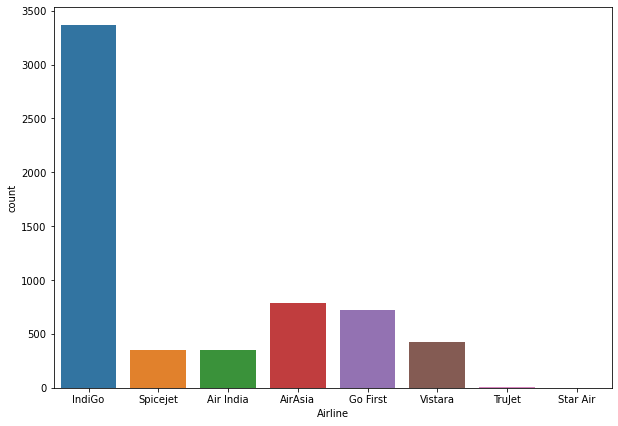

In [46]:
plt.figure(figsize = (10,7))
sns.countplot(flight1['Airline'])

<AxesSubplot:xlabel='Source', ylabel='count'>

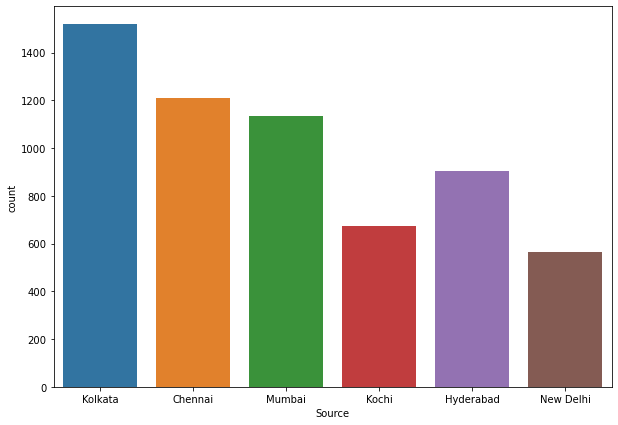

In [47]:
plt.figure(figsize = (10,7))
sns.countplot(flight1['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

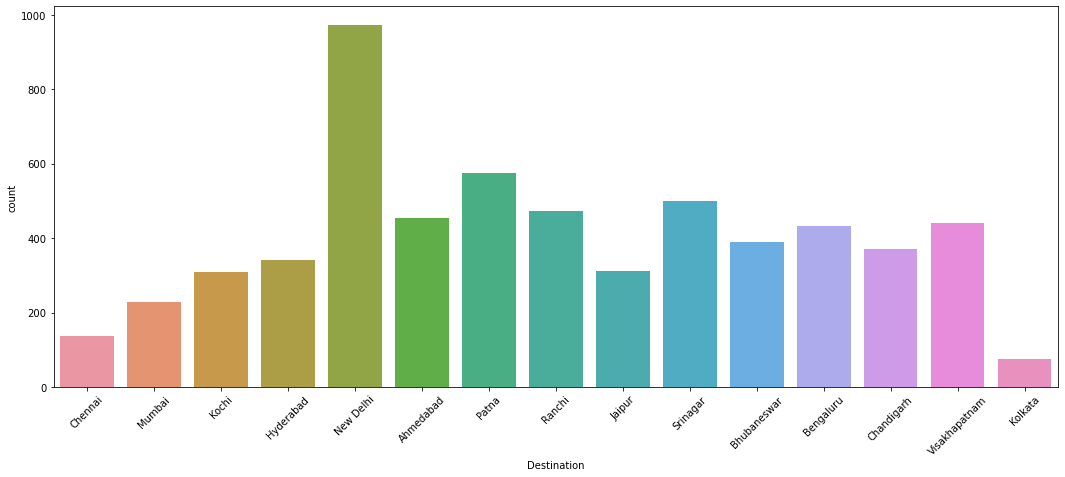

In [48]:
plt.figure(figsize = (18,7))
plt.xticks(rotation = 45)
sns.countplot(flight1['Destination'])

## Airline:<br>
Indigo would be the most preferred Airline.<br>

## Source: <br>
Majority of flights take off from Kolkatta and Chennai. <br>

## Destination: <br>
Maximum flights land in New Delhi and Patna

In [49]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [50]:
flight1.columns

Index(['Airline', 'Source', 'Destination', 'Stops', 'Price_cleaned', 'Date',
       'Dept_time_hour', 'Dept_time_mins', 'Arrv_time_hour', 'Arrv_time_mins',
       'Mins_duration', 'Hours_duration'],
      dtype='object')

In [51]:
convert = ['Airline', 'Source', 'Destination']

In [52]:
for column in convert:
    flight1[column] = le.fit_transform(flight1[column])

In [53]:
x= flight1.drop('Price_cleaned', axis=1)
y= flight1['Price_cleaned']

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

# MODEL BUILDING

## Finding the best random state for the model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.21010955274912968 on random state 162


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=162)

In [58]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 3951129.8232569117
mean_absolute_error: 1463.1268946822345
r2_score: 0.21010955274912968
0.16825673897475402


In [59]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 3283859.4165395633
mean_absolute_error: 929.3603716028839
r2_score: 0.3435069716081163
0.9388095698999773


In [60]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 1964867.4326944842
mean_absolute_error: 785.3666957768844
r2_score: 0.6071933637654106
0.9035527579890125


In [61]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 3267900.803793677
mean_absolute_error: 1222.9873544093177
r2_score: 0.3466973390025647
0.5865172409600627


In [62]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 4889061.822355202
mean_absolute_error: 1581.4315023178292
r2_score: 0.022602799137080853
0.014483811066058339


In [63]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 4879346.504607525
mean_absolute_error: 1868.4375177001934
r2_score: 0.02454503769267735
0.13459243750412753


In [64]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 2223448.448528599
mean_absolute_error: 995.1604648224085
r2_score: 0.5554991184775071
0.5911167847797305


## Crossvalidation

In [65]:
from sklearn.model_selection import cross_val_score

lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: -0.027328200631524902


In [66]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.045963197451202295


In [67]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : -0.5990856935578084


In [68]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: -0.12751292378433532


In [69]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: -0.141245603299435


In [70]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: -0.2724622864649605


In [71]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.2362723635549589


## Hyperparameter Tuning with RandomForest Regression

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [74]:
GCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [75]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'mse'}

## Model with RandomForest Regression

In [76]:
model = RandomForestRegressor(n_estimators=150, criterion='mse', max_depth=7, max_features='auto')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model.score(x_train,y_train)*100)

mean_squared_error: 2247384.0439524255
mean_absolute_error: 991.9578652113487
r2_score: 0.5507140319275143
63.9694593364267


# SAVING THE MODEL

In [ ]:
import joblib
joblib.dump(model,"_price_prediction_submission.pkl")